Question1: How much impact does being late or too spaced out at the first stop have downstream?

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
wego = pd.read_csv('../data/headway_data_clean.csv')

In [3]:
# convert times to datetime64 objects, check dtype to confirm
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], format = '%Y-%m-%d %H:%M:%S')
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'], format = '%Y-%m-%d %H:%M:%S')
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'], format = '%Y-%m-%d %H:%M:%S')
wego['DATE'] = pd.to_datetime(wego['DATE'], format = "%Y/%m/%d")


In [4]:
#Create a column that gives each day of the week its on variable
wego['DAYS_OF_THE_WEEK'] = wego['DATE'].dt.weekday


In [5]:
#Lateness information on the first stop, middle stops and the last stop
wego.groupby('TRIP_EDGE')['ADHERENCE'].describe()

,count,mean,std,min,25%,50%,75%,max
TRIP_EDGE,,,,,,,,
0,207872.0,-3.692178,5.634956,-141.183333,-5.016666,-2.30,-0.583333,85.666666
1,65711.0,-2.760552,8.510429,-948.533333,-3.533333,-1.95,-0.833333,84.666666
2,65277.0,-2.016883,8.407097,-489.316666,-4.433333,-0.50,2.333333,88.383333


In [6]:
#dropping all nan values in the adherence column
wego = wego.dropna(subset = 'ADHERENCE')

In [7]:
#creating a column that will number which the stop number
wego['row_num'] = 1
wego['STOPS'] = wego.groupby(['TRIP_ID', 'CALENDAR_ID'])['row_num'].cumsum()

In [8]:
#grouping the dataframe by route number, stop and whether the bus is going downtown or from downtown
wego.groupby(['ROUTE_ABBR', 'STOPS', 'ROUTE_DIRECTION_NAME'])['ADHERENCE'].mean().sort_index()

ROUTE_ABBR  STOPS  ROUTE_DIRECTION_NAME
3           1      FROM DOWNTOWN           -3.280698
                   TO DOWNTOWN             -2.859763
            2      FROM DOWNTOWN           -4.982430
                   TO DOWNTOWN             -2.629393
            3      FROM DOWNTOWN           -5.113081
                                             ...    
56          10     FROM DOWNTOWN          -10.822222
                   TO DOWNTOWN              3.983333
            11     FROM DOWNTOWN          -11.872222
            12     FROM DOWNTOWN          -12.038889
            13     FROM DOWNTOWN          -16.850000
Name: ADHERENCE, Length: 140, dtype: float64

In [9]:
#grouping the dataframe by route 3, stop and whether the bus is going downtown or from downtown
wego.groupby(['ROUTE_ABBR', 'STOPS', 'ROUTE_DIRECTION_NAME'])['ADHERENCE'].mean().sort_index().head(20)

ROUTE_ABBR  STOPS  ROUTE_DIRECTION_NAME
3           1      FROM DOWNTOWN           -3.280698
                   TO DOWNTOWN             -2.859763
            2      FROM DOWNTOWN           -4.982430
                   TO DOWNTOWN             -2.629393
            3      FROM DOWNTOWN           -5.113081
                   TO DOWNTOWN             -2.643745
            4      FROM DOWNTOWN           -5.431550
                   TO DOWNTOWN             -2.805948
            5      FROM DOWNTOWN           -5.806665
                   TO DOWNTOWN             -2.636983
            6      FROM DOWNTOWN           -3.898926
                   TO DOWNTOWN             -2.377708
            7      FROM DOWNTOWN           -5.295757
                   TO DOWNTOWN             -8.272222
            8      FROM DOWNTOWN          -13.641666
                   TO DOWNTOWN             -6.916667
            9      FROM DOWNTOWN          -16.908333
                   TO DOWNTOWN            -12.441667
      

In [10]:
#viewing route 3
route_3 = wego.loc[
    (wego['ROUTE_ABBR'] == 3)
]

In [11]:
first_last_route_3 = route_3[(route_3['TRIP_EDGE'] == 1) | (route_3['TRIP_EDGE'] == 2)]

In [12]:
first_last_route_3

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,DAYS_OF_THE_WEEK,row_num,STOPS
1272,120230801,1,99459625,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 04:49:00,2023-08-01 04:41:52,2023-08-01 04:50:18,-1.300000,NaN,NaN,NaN,0,0,1,0,0.0,0,2,8.433333,1,1,1
1276,120230801,1,99459629,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,MCC5_5,2.0,2,36.167091,-86.781923,2023-08-01 05:13:00,2023-08-01 05:08:54,2023-08-01 05:08:54,4.100000,NaN,NaN,NaN,0,0,1,0,NaN,0,28,0.000000,1,1,5
1277,120230801,1,99459630,2023-08-01,3,300,2529,346049,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 05:20:00,2023-08-01 05:08:54,2023-08-01 05:21:20,-1.333333,NaN,NaN,NaN,0,0,1,0,0.0,0,29,12.433333,1,1,1
1281,120230801,1,99459634,2023-08-01,3,300,2529,346049,0,FROM DOWNTOWN,WHBG,6.0,2,36.149179,-86.858044,2023-08-01 05:45:00,2023-08-01 05:44:53,2023-08-01 05:44:53,0.116666,NaN,NaN,NaN,0,0,1,0,NaN,0,56,0.000000,1,1,5
1282,120230801,1,99459635,2023-08-01,3,300,2529,346050,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 05:59:00,2023-08-01 05:44:53,2023-08-01 06:02:56,-3.933333,20.0,23.833333,3.833333,0,0,1,0,0.0,0,57,18.050000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347527,120230930,2,100403100,2023-09-30,3,312,2001,351174,0,FROM DOWNTOWN,MP&R,8.0,2,36.079608,-86.955657,2023-09-30 22:27:00,2023-09-30 22:27:34,2023-09-30 22:27:34,-0.566666,NaN,NaN,NaN,0,0,1,0,NaN,0,883,0.000000,5,1,6
347528,120230930,2,100403101,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,MP&R,8.0,1,36.079608,-86.955657,2023-09-30 23:00:00,2023-09-30 22:27:34,2023-09-30 23:01:13,-1.216666,61.0,57.450000,-3.550000,0,0,1,0,0.0,0,884,33.650000,5,1,1
347533,120230930,2,100403106,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,MCC5_5,2.0,2,36.167091,-86.781923,2023-09-30 23:38:00,2023-09-30 23:42:53,2023-09-30 23:42:53,-4.883333,NaN,NaN,NaN,0,0,1,0,NaN,0,932,0.000000,5,1,6
347534,120230930,2,100403107,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-09-30 23:45:00,2023-09-30 23:42:53,2023-09-30 23:49:27,-4.450000,30.0,25.300000,-4.700000,0,0,1,0,0.0,0,933,6.566666,5,1,1


In [27]:
first_last_route_3[first_last_route_3['STOPS']== 5]['TIME_POINT_ABBR'].value_counts() 

MCC5_5    2109
WHBG      2046
MP&R        31
HRWB         1
Name: TIME_POINT_ABBR, dtype: int64

In [28]:
first_last_route_3[first_last_route_3['STOPS']== 6]['TIME_POINT_ABBR'].value_counts()

MP&R      1929
MCC5_5    1898
WHBG         2
Name: TIME_POINT_ABBR, dtype: int64

In [29]:
route_3

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,DAYS_OF_THE_WEEK,row_num,STOPS
1272,120230801,1,99459625,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 04:49:00,2023-08-01 04:41:52,2023-08-01 04:50:18,-1.300000,NaN,NaN,NaN,0,0,1,0,0.0,0,2,8.433333,1,1,1
1273,120230801,1,99459626,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,HRWB,5.0,0,36.125659,-86.846500,2023-08-01 04:54:00,2023-08-01 04:54:05,2023-08-01 04:54:05,-0.083333,NaN,NaN,NaN,0,0,1,0,0.0,0,8,0.000000,1,1,2
1274,120230801,1,99459627,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,WE31,4.0,0,36.143233,-86.814581,2023-08-01 05:00:00,2023-08-01 04:59:35,2023-08-01 04:59:35,0.416666,NaN,NaN,NaN,0,0,1,0,0.0,0,16,0.000000,1,1,3
1275,120230801,1,99459628,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,WE23,3.0,0,36.148685,-86.804611,2023-08-01 05:03:00,2023-08-01 05:02:00,2023-08-01 05:02:00,1.000000,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,1,1,4
1276,120230801,1,99459629,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,MCC5_5,2.0,2,36.167091,-86.781923,2023-08-01 05:13:00,2023-08-01 05:08:54,2023-08-01 05:08:54,4.100000,NaN,NaN,NaN,0,0,1,0,NaN,0,28,0.000000,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347534,120230930,2,100403107,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-09-30 23:45:00,2023-09-30 23:42:53,2023-09-30 23:49:27,-4.450000,30.0,25.300000,-4.700000,0,0,1,0,0.0,0,933,6.566666,5,1,1
347535,120230930,2,100403108,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,WE23,3.0,0,36.149007,-86.804449,2023-09-30 23:56:00,2023-09-30 23:58:48,2023-09-30 23:58:48,-2.800000,30.0,46.566666,16.566666,0,0,1,0,0.0,0,941,0.000000,5,1,2
347536,120230930,2,100403109,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,WE31,4.0,0,36.143040,-86.815175,2023-09-30 23:58:00,2023-09-30 00:00:34,2023-09-30 00:02:24,-4.400000,30.0,45.750000,15.750000,0,0,1,0,0.0,0,944,1.833333,5,1,3
347537,120230930,2,100403110,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,HRWB,5.0,0,36.126788,-86.845188,2023-09-30 00:03:00,2023-09-30 00:06:14,2023-09-30 00:06:14,-3.233333,30.0,44.950000,14.950000,0,0,1,0,0.0,0,952,0.000000,5,1,4


In [22]:
first_last_route_3['STOPS'].value_counts()

1     8361
5     4187
6     3829
7       53
2       46
4       25
3       18
10       1
9        1
8        1
Name: STOPS, dtype: int64

In [13]:
first_last_route_3[['TRIP_EDGE', 'ADHERENCE']]

,TRIP_EDGE,ADHERENCE
1272,1,-1.300000
1276,2,4.100000
1277,1,-1.333333
1281,2,0.116666
1282,1,-3.933333
...,...,...
347527,2,-0.566666
347528,1,-1.216666
347533,2,-4.883333
347534,1,-4.450000


In [14]:
first_last_route_3['TRIP_EDGE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16522 entries, 1272 to 347538
Series name: TRIP_EDGE
Non-Null Count  Dtype
--------------  -----
16522 non-null  int64
dtypes: int64(1)
memory usage: 258.2 KB


In [15]:
first_last_route_3['TRIP_EDGE'].corr(first_last_route_3['ADHERENCE'])

-0.06917332547219034

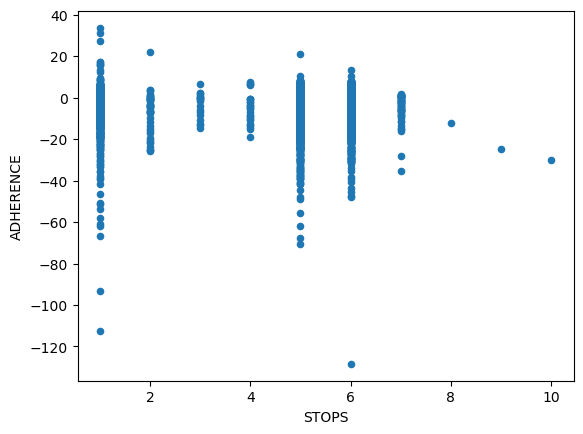

In [16]:
first_last_route_3.plot.scatter(x = 'STOPS', y = 'ADHERENCE')
plt.show()

In [17]:
#viewing route 3 going dowtown the first stop.
#wego.loc[
    #(wego['ROUTE_ABBR'] == 3) & (wego['ROUTE_DIRECTION_NAME']== 'TO DOWNTOWN') & (wego['TRIP_EDGE'] == 1)
#]

In [18]:
#viewing route 3 going dowtown the last stop.
 #wego.loc[
    #(wego['ROUTE_ABBR'] == 3) & (wego['ROUTE_DIRECTION_NAME']== 'TO DOWNTOWN') & (wego['TRIP_EDGE'] == 2)
#]

In [ ]:
#How often a bus route will begin late
59602/67415

**88% of the time a bus will begin late **

**Question does the routes with more stops have a correlation with adherence**

In [ ]:
#wego.groupby(['ROUTE_ABBR', 'TRIP_EDGE'])['ADHERENCE'].mean()